# Lecture 0: Introduction to Numerical Computing with Python

In this class we will use Jupyter notebooks to present our work, which includes computational results and written analysis.  We will also develop our own Python module where we implement the techniques that we develop.

## Limits and errors

Calculus is such a sprawling subject that many students finish without being able to clearly say what calculus is really all about.  In the typical calculus course, we drill methods for determining that such and such derivative (or integral) _equals_ such and such expression.  So, student often leave thinking that calculus is about computing derivatives and integrals.  There are several popular definitions of calculus (e.g., the mathematics of change), but most of them are rather limited.  I prefer to say that calculus is the applications of limits since, ultimately, all the major concepts of calculus are based on limits.

What then is a limit?  The limit concept is the mathematical formalism that enables us to engage in "clear-headed thinking" about approximation, error, and tolerance.  

**Definition.** We say that the **limit** of $f(x)$ as $x$ approaches $a$ is $L$, and we write
$f(x)\to L$ as $x\to a$ or
$$\lim_{x\to a}f(x) = L,$$ 
provided that for every $\epsilon>0$, there is a $\delta>0$ so that
$$|f(x) - L| < \epsilon$$
for all $x$ in the domain of $f$ so that $0<|x-a|<\delta$.

Now let us "unpack" that definition.
The expression $|f(x)-L|$ measures the distance between $f(x)$ and $L$, and hence should be interpreted as the **absolute error** in the approximation $f(x)\approx L$.  To say that we can force $|f(x)-L|<\epsilon$ for _every_ positive $\epsilon$ is to say that we can make the error in that approximation as small as we like.  We should think of $\epsilon$ then as our acceptable **error tolerance** which, in principle, can always be made smaller should requirements demand it. However, no one can require us to make the error equal to zero – that would be unreasonable.

But _how_ do we force the error to be within requirements?  We do it by adjusting the "control variable" $x$ sufficiently close, but not equal to, $a$.  The statement $0<|x-a|$ says that $x\ne a$, and the statement $|x-a|<\delta$ says that $x$ is within $\delta$ of $a$.  To determine $\delta$ for a given tolerance $\epsilon$ is then to determine how close we need to draw $x$ toward $a$ so that the approximation $f(x)\approx L$ meets requirements.

Notice that the only place we see an equals sign in that entire discussion is in the notation $\lim_{x\to a}f(x) = L$.  The definition of limit tells us that what that equals sign really means is that it is possible to "win at a game of inequalities."  This is why I say that calculus is not really about equality but rather about inequality.  Calculus employs a lot of ingenious notational tricks that allow us to focus our attention on the "targets of approximation" (e.g., the $L$ in the above definition) and mostly ignore the gritty details concerning error.  

Why do we do this?  A first step in approximation is knowing what you're approximating and if it really is a thing.  Does the limit exist or am I approximating garbage?  If the limit does exist, what is it?  

## Big-oh notation

Suppose $f$ and $g$ are functions of a real variable $x$ and that both are defined on an open interval containing $x=a$ except possibly at $x=a$ itself.  We say that $f$ **is of order $g$ at** $x=a$, and we write
$$f(x)\ll g(x)\text{ as } x\to a$$
or
$$f(x) = O\big(g(x)\big)\text{ as } x\to a$$
if there are constants $M, \delta>0$ so that
$$|f(x)|\le M|g(x)|$$
for all $x$ so that $0<|x-a|<\delta$.

We write 
$$f(x) = g(x) +O\big(h(x)\big)\text{ as }x\to a$$
if $f(x) - g(x)\ll h(x)$.

## Numerical differentiation

In calculus, we learn that the derivative
$$f'(a) = \lim_{h\to 0}\frac{f(a+h) - f(a)}{h}$$
represents the (instantaneous) rate of change in $f$ with respect to $x$ at the point $x=a$.  Therefore, when the limit exists, 
$$f'(a)\approx \frac{f(a+h)-f(a)}{h}$$
and the error in this approximation can be made arbitrarily small by taking $h$ sufficiently close to (but not equal to) $0$.  So, how close is close enough?

By Lagrange's remainder theorem, if the second derivative $f''$ is continuous in a neighborhood of $x=a$, then there is a number $c$ between $x$ and $a$ so that
\begin{equation*}
f(x) = f(a) + f'(a)(x-a) + \frac{1}{2}f''(c)(x-a)^2.
\end{equation*}
Writing $x=a+h$,
\begin{equation*}
f(a+h) = f(a) + f'(a)h + \frac{1}{2}f''(c)h^2.
\end{equation*}
Thus, it follows that there is an $M>0$ so that
\begin{equation*}
\left|f'(a) - \frac{f(a+h)-f(a)}{h}\right| \le Mh,
\end{equation*}
i.e.,
\begin{equation*}
f'(a) = \frac{f(a+h)-f(a)}{h} + O(h) \text{ as } h\to 0.
\end{equation*}

IDEA: Do forward/backward difference with error analysis.  Have them do centered difference.

In [1]:
import numpy as np

In [15]:
def fdiff(f, a, h):
    return (f(a+h)-f(a))/h;

def bdiff(f, a, h):
    return (f(a-h)-f(a))/(-h);

In [26]:
fdiff(lambda x: np.sin(x), 0, 0.01)

0.9999833334166665

In [24]:
bdiff(lambda x: np.sin(x), 0, 0.1)

0.9983341664682815

## Algebra

In [14]:
#from sympy import symbols
x, y=sympy.symbols('x y')
expr = x**2+2*y
expr

x**2 + 2*y

In [16]:
x, t = sympy.symbols('x t')
sympy.diff(sympy.sin(x)*sympy.exp(x), x)

exp(x)*sin(x) + exp(x)*cos(x)

We could do `from sympy import *` to avoid needing to specify that we want the sympy version of sin() and exp(), but our main focus is numerical computation, and we want to keep math.sin and sympy.sin separate.  If anything, we will do `from math import *` so that we have shorthand access to the ordinary numerical versions.  Or maybe we want the numpy versions

In [17]:
import numpy
numpy.sin(1)

0.8414709848078965

In [18]:
sympy.limit(sympy.sin(x)/x, x, 0)

1

Eq(y(t), C2*exp(-t) + (C1 + t/2)*exp(t))

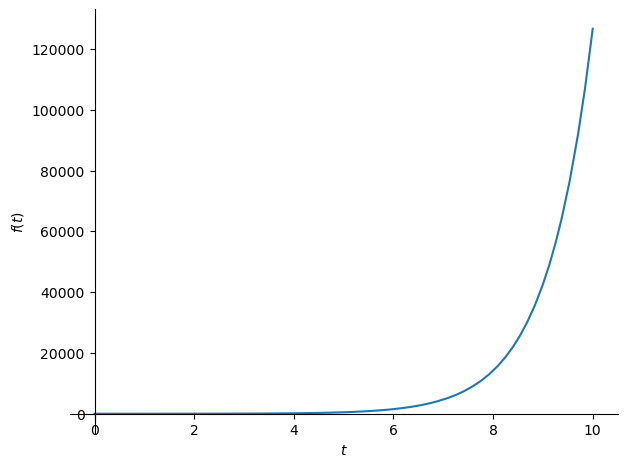

In [19]:
y = sympy.Function('y')
y(t).diff(t,2)
display(sympy.dsolve(y(t).diff(t,2)-y(t)-sympy.exp(t),y(t)))
soln=sympy.dsolve(y(t).diff(t,2)-y(t)-sympy.exp(t),y(t),ics={y(0): 1, y(t).diff(t).subs(t,0): 1})
sympy.plot(soln.rhs,(t,0,10));

Eq(v(t), 4.9 - 4.9*exp(-2.0*t))

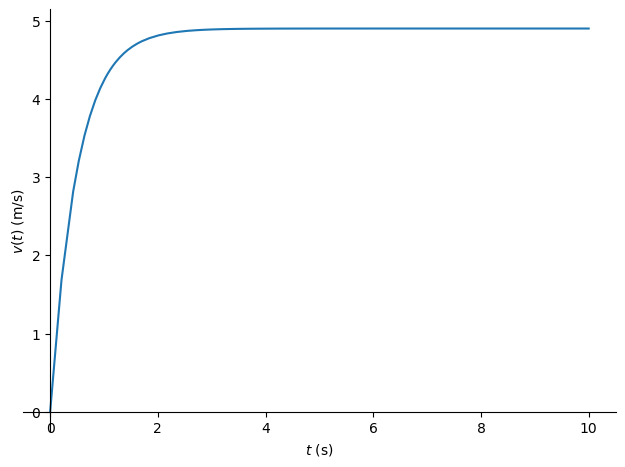

In [37]:
m = 1
g = 9.8
k = 2
f = sympy.Function('f')
f1 = g * m
t = sympy.Symbol('t')
v = sympy.Function('v')
equation = sympy.dsolve(f1 - k * v(t) - m * sympy.Derivative(v(t)), 0)
C1 = sympy.Symbol('C1')
C1_ic = sympy.solve(equation.rhs.subs({t:0}),C1)[0]
equation = equation.subs({C1:C1_ic});
display(equation);
sympy.plot(equation.rhs,(t,0,10),ylabel="$v(t)$ (m/s)", xlabel="$t$ (s)");